In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.app.flags.DEFINE_string('f', '', 'kernel')
import rnn_transformer
radar = rnn_transformer.Radar(mod='null')
def test_plot(inputs, labels, indexs):
    new_signal = []
    for x,y in zip([float(i) for i in inputs[indexs]], [float(i) for i in labels[indexs]]):
        new_signal.append(y-x)
    plt.plot(new_signal)

False
<class 'bool'>


W0324 14:13:22.921340 140043513521984 deprecation_wrapper.py:119] From /home/jwmun/ICASSP_paper/github/MIMOsimule/rnn_transformer.py:55: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0324 14:13:22.947801 140043513521984 deprecation_wrapper.py:119] From /home/jwmun/ICASSP_paper/github/MIMOsimule/rnn_transformer.py:72: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0324 14:13:22.948952 140043513521984 deprecation.py:323] From /home/jwmun/ICASSP_paper/github/MIMOsimule/rnn_transformer.py:73: GRUCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
W0324 14:13:22.952200 140043513521984 deprecation.py:323] From /home/jwmun/ICASSP_paper/github/MIMOsimule/rnn_transformer.py:75: bidirectional_dynamic_rnn (from tensorflow.python

finished loading data!!
all data size is 256000
train size is (255000, 128, 8)
valid size is (1000, 128, 8)


W0324 14:13:25.268993 140043513521984 deprecation_wrapper.py:119] From /home/jwmun/ICASSP_paper/github/MIMOsimule/rnn_transformer.py:141: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0324 14:13:29.378639 140043513521984 deprecation_wrapper.py:119] From /home/jwmun/ICASSP_paper/github/MIMOsimule/rnn_transformer.py:66: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



In [2]:
import tensorflow as tf
import time
start_time = time.time()
save_path = '../../save_data/model_mimo'
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config) as sess:
    radar.saver.restore(sess, save_path)
    start_time = time.time()
    outputs = sess.run(radar.logits, feed_dict={radar.signal_input: radar.valid_inputs[:50], radar.rnn_keep_prob: 1, radar.dense_drop_rate: 0})
    end_time = time.time()
print(end_time-start_time)

W0324 14:25:20.503672 140043513521984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


1.2317471504211426


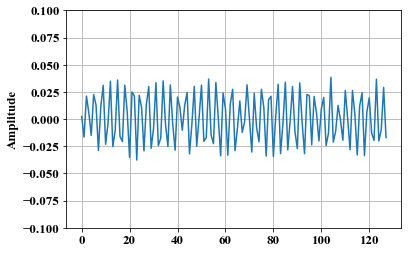

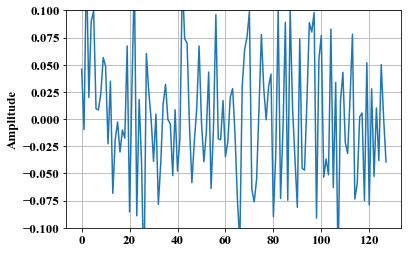

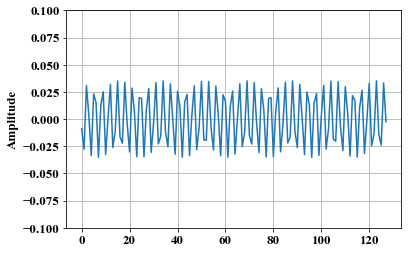

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.font_manager._rebuild()
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
index1 = 10
index2 = 7
plt.figure(0)
plt.plot(outputs[index1][:,index2])
plt.grid()
plt.ylabel('Amplitude')
plt.ylim([-0.1,0.1])
plt.savefig('outputs.png', dpi=350, bbox_inches='tight')

plt.figure(1)
plt.plot(radar.valid_inputs[index1][:,index2])
plt.grid()
plt.ylabel('Amplitude')
plt.ylim([-0.1,0.1])
plt.savefig('valid_inputs.png', dpi=350, bbox_inches='tight')

plt.figure(2)
plt.plot(radar.valid_labels[index1][:,index2])
plt.grid()
plt.ylabel('Amplitude')
plt.ylim([-0.1,0.1])
plt.savefig('valid_labels.png', dpi=350, bbox_inches='tight')